  Embarazos Glucosa PresionArterial EspesorPiel Insulina   Imc ArbolDiabetes  \
1         6     148              72          35        0  33.6         0.627   
2         1      85              66          29        0  26.6         0.351   
3         8     183              64           0        0  23.3         0.672   
4         1      89              66          23       94  28.1         0.167   
5         0     137              40          35      168  43.1         2.288   

  Edad Salida  
1   50      1  
2   31      0  
3   32      1  
4   21      0  
5   33      1  
Porcentaje de exactitud: 0.70995670995671
Precisión Regresión Logística:
0.7653631284916201
Precisión Soporte de Vectores:
0.7597765363128491
Precisión Vecinos más Cercanos:
0.8286778398510242
Predicción Regresión Logística:
  Edad Salida
1   50      1
2   31      1
3   32      1
4   21      1
5   33      1
Predicción Soporte de Vectores:
  Edad Salida
1   50      1
2   31      0
3   32      1
4   21      0
5   33      

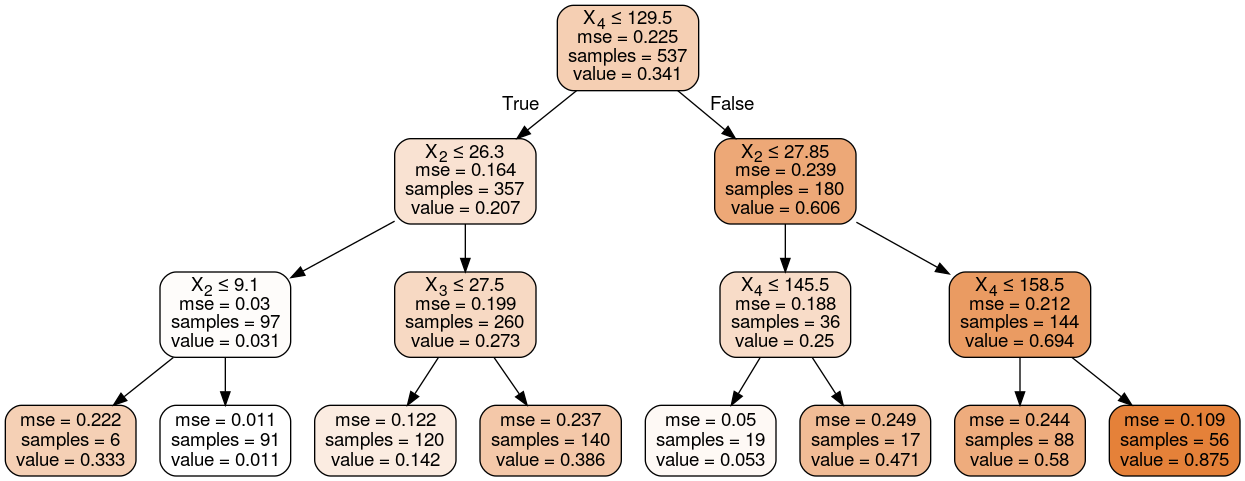

In [126]:
# Cargamos librerias especiales para los calcúlos
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Nombres de las columnas
col_names = ['Embarazos', 'Glucosa', 'PresionArterial', 'EspesorPiel', 'Insulina', 'Imc', 'ArbolDiabetes', 'Edad', 'Salida']
# Cargamos el dataset en formato CSV
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

#Eliminamos la fila principal para quitarlo de los valores ya que son de tipo String
pima = pima.drop(0, axis=0)

#Imprimimos el dataset
print(pima.head())

#print(pima.describe())

#Dividiendo los las columnas en datos dependientes e independientes
feature_cols = ['Embarazos', 'Insulina', 'Imc', 'Edad','Glucosa','PresionArterial','EspesorPiel']
X = pima[feature_cols] # Features
y = pima['Salida']# Target variable


#Dividiendo los datos en datos de Entrenamiento y Prueba con un porcentaje de 70% Y 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Objeto del arbol de clasificación
clf = DecisionTreeClassifier()

# Entrenar el arbol de clasificación
clf = clf.fit(X_train,y_train)

#Predecir con base al conjunto de prueba
y_pred = clf.predict(X_test)


# Modelo de precision para saber que tan exacto es
print("Porcentaje de exactitud:",metrics.accuracy_score(y_test, y_pred))
#Columnas del dataset
#print ('Train set:', X_train.shape,  y_train.shape)
#print ('Test set:', X_test.shape,  y_test.shape)


#pima.dropna(axis=0, how='any', inplace=True)


#Se importan las librerias para el arbol
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeRegressor

#Se crea el arbol de decisión
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(X_train, y_train)

# Predecir valores de entrenamiento y prueba
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

##Regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, y_train))
##Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print('Precisión Soporte de Vectores:')
print(svc.score(X_train, y_train))
##K neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print('Precisión Vecinos más Cercanos:')
print(knn.score(X_train, y_train))


#Implementar con base modelos
print('Predicción Regresión Logística:')
pima.drop(['Embarazos'], axis = 1, inplace=True)
ids = pima['Edad']
##Regresión logística
prediccion_logreg = logreg.predict(pima.drop('Edad', axis=1))
out_logreg = pd.DataFrame({ 'Edad' : ids, 'Salida': prediccion_logreg })
print(out_logreg.head())
##Support Vector Machines
prediccion_svc = svc.predict(pima.drop('Edad', axis=1))
out_svc = pd.DataFrame({ 'Edad' : ids, 'Salida': prediccion_svc })
print('Predicción Soporte de Vectores:')
print(out_svc.head())
##K neighbors
prediccion_knn = knn.predict(pima.drop('Edad', axis=1))
out_knn = pd.DataFrame({ 'Edad' : ids, 'Salida': prediccion_knn })
print('Predicción Vecinos más Cercanos:')
print(out_knn.head())

#print("ENTRENAMIENTO")
#print(train_predictions)
#print("PRUEBA")
#print(test_predictions)
#logistic = LogisticRegression(random_state = 0)
#logistic.fit(X_train, y_train)
#y_predict_py = logistic.predict(X_test)

#print(y_predict_py)

#Variable para generar el arbol de decision
dot_data = StringIO()
#Caracteristicas del arbol de decision
export_graphviz(decision_tree, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
#Datos del arbol de decision
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Nombre del arbol de decision
graph.write_png('decision_tree.png')
#Generación del arbol
Image(graph.create_png())